# Projeto ADEL (Análise Dados Estadia em Limeira) - Análise das acomodações coletadas
Neste notebook, realizarei a limpeza dos dados e determinarei o ranking das melhores acomodações do dataset gerado anteriormente.

## Carregando os dados

In [99]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
file = files.upload()

Saving acomodacoes_hashcode.csv to acomodacoes_hashcode.csv


In [118]:
df = pd.read_csv('acomodacoes_hashcode.csv')
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...


Realizar tratamentos nas colunas:
* Aluguel
* Condomínio
* Área
* Vaga garagem

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imob          80 non-null     object
 1   imovel_url    80 non-null     object
 2   codigo        80 non-null     object
 3   nome          80 non-null     object
 4   bairro        80 non-null     object
 5   aluguel       80 non-null     object
 6   condominio    80 non-null     object
 7   area          78 non-null     object
 8   quartos       80 non-null     int64 
 9   banheiros     80 non-null     int64 
 10  vaga_garagem  37 non-null     object
 11  descricao     80 non-null     object
dtypes: int64(2), object(10)
memory usage: 7.6+ KB


Conferindo as 3 imobiliárias

In [120]:
df['imob'].unique()

array(['c7234506476bbf0aff48eda764ff9eba',
       'ef23a7e1738f4b316011bbdd88e514a2',
       '53dd1202c5ef8ce3878ffbd4b3c79bd2'], dtype=object)

## Limpeza dos dados

In [121]:
df.isnull().sum()

imob             0
imovel_url       0
codigo           0
nome             0
bairro           0
aluguel          0
condominio       0
area             2
quartos          0
banheiros        0
vaga_garagem    43
descricao        0
dtype: int64

### Coluna: vaga de garagem

In [122]:
df['vaga_garagem'].unique()

array(['0', '1', nan, 'Não', 'Sim'], dtype=object)

In [123]:
# Mapeando para inteiro
map_vaga_garagem = {
    'Não': 0,
    'Sim': 1
}

df['vaga_garagem'] = df['vaga_garagem'].map(map_vaga_garagem)
df['vaga_garagem'].unique()

array([nan,  0.,  1.])

In [125]:
print(df['vaga_garagem'].dtype)
print(df['vaga_garagem'].unique())

float64
[nan  0.  1.]


In [126]:
df['vaga_garagem']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
75    NaN
76    1.0
77    NaN
78    0.0
79    0.0
Name: vaga_garagem, Length: 80, dtype: float64

### Coluna: área

In [127]:
df['area'].unique()

array(['35      M2', '1       QUARTO CONJUGADO',
       '1       QUARTO COM ARMARIO',
       '1       QUARTO CONJUGADO COM A SALA',
       '1       QUARTO CONJUGADO COM COZINHA', nan, '16      M2',
       '1º      ANDAR', '25      M2', '0 m2', '50 m2', '250 m2', '20',
       '30', '0'], dtype=object)

In [12]:
# Preenchendo nulos com 0
df['area'] = df['area'].fillna('0')

In [128]:
# Coletando apenas o número e convertendo para int
areas = []
for i in range(len(df['area'])):
  try:
    area_value = int(re.findall('\d[0-9]+', df['area'][i])[0])
  except:
    area_value = np.nan
  areas.append(area_value)
areas

[35,
 35,
 35,
 35,
 35,
 nan,
 nan,
 35,
 nan,
 35,
 35,
 nan,
 35,
 35,
 nan,
 35,
 35,
 35,
 35,
 nan,
 16,
 16,
 nan,
 16,
 16,
 25,
 25,
 16,
 nan,
 50,
 50,
 nan,
 50,
 nan,
 nan,
 50,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 250,
 nan,
 nan,
 50,
 50,
 nan,
 nan,
 nan,
 nan,
 nan,
 20,
 20,
 20,
 20,
 30,
 30,
 nan,
 nan,
 nan]

In [129]:
# Fazendo o tratamento
df['area'] = areas
print(df['area'].dtype)
print(df['area'].unique())

float64
[ 35.  nan  16.  25.  50. 250.  20.  30.]


In [130]:
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       80 non-null     object 
 6   condominio    80 non-null     object 
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.6+ KB


### Coluna: aluguel

In [132]:
df['aluguel'].unique()

array(['R$1.000,00', 'R$850,00', 'R$750,00', 'R$950,00', 'R$ 1.000,00',
       'R$ 900,00', 'R$ 850,00', 'R$ 800,00', 'R$ 780,00', 'R$ 700,00',
       'R$ 500,00', 'Sob consulta', 'Locação:  R$ 780,00',
       'Locação:  R$ 800,00', 'Locação:  R$ 850,00',
       'Locação:  R$ 950,00', 'Locação:  R$ 1.000,00'], dtype=object)

In [133]:
# Extraindo numeros com ',' e convertendo para float
values_extracted = []
for i in range(len(df['aluguel'])):
  try:
    value_extracted = re.findall('[0-9]+[,]*', df['aluguel'][i])
    value_extracted = float(''.join(value_extracted).replace(',', '.'))
  except:
    value_extracted = np.nan
  values_extracted.append(value_extracted)
values_extracted

[1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 850.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 750.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 900.0,
 900.0,
 900.0,
 900.0,
 900.0,
 900.0,
 850.0,
 850.0,
 850.0,
 850.0,
 800.0,
 800.0,
 800.0,
 780.0,
 780.0,
 700.0,
 700.0,
 700.0,
 500.0,
 nan,
 780.0,
 800.0,
 800.0,
 800.0,
 850.0,
 850.0,
 950.0,
 1000.0,
 1000.0]

In [134]:
# Fazendo tratamento
df['aluguel'] = values_extracted
print(df['aluguel'].dtype)
print(df['aluguel'].unique())

float64
[1000.  850.  750.  950.  900.  800.  780.  700.  500.   nan]


In [135]:
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


### Coluna: condomínio

In [136]:
df['condominio'].unique()

array(['\n\n                    + Condomínio R$0,00 i\nValores sujeitos a alteração.\n\n+ IPTU R$0,00\n',
       '\n\n                    + Condomínio R$100,00 i\nValores sujeitos a alteração.\n\n+ IPTU R$0,00\n',
       '0.0', '80.0'], dtype=object)

In [137]:
# Extraindo somente os numeros e convertendo para float
values_extracted = []
for i in range(len(df['condominio'])):
  try:
    value_extracted = re.findall('[0-9]+[,.][0-9]+', df['condominio'][i])
    value_extracted = [float(x.replace(',', '.')) for x in value_extracted]
    value_extracted = sum(value_extracted)
  except:
    value_extracted = np.nan
  values_extracted.append(value_extracted)
values_extracted

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 80.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [138]:
# Fazendo tratamento
df['condominio'] = values_extracted
print(df['condominio'].dtype)
print(df['condominio'].unique())

float64
[  0. 100.  80.]


In [139]:
print(df.shape)
df.sample(5)

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
53,ef23a7e1738f4b316011bbdd88e514a2,f9e143fd88cff8563a467df71cc70b44,d81e604fe471f170cc3cc19ee73c20dc,fc5f4e72ac82ea901f0f4f77ab0e9281,Jardim Paulista - Limeira/Sp,900.0,0.0,NaN,1,1,NaN,Imóvel totalmente reformado para atender espec...
7,c7234506476bbf0aff48eda764ff9eba,3c4f789084c796e08666b8db67e710b3,0236a38d5e4d324ecebfb8c807b7f238,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
48,ef23a7e1738f4b316011bbdd88e514a2,426efdfedb177f22cf060a2db44dd31a,941707c7ec03960821a488b2754bd59a,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I - Limeira/Sp,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado Conta com sala e ...
18,c7234506476bbf0aff48eda764ff9eba,a1821f50b18cd950131c1906d6fc2750,02ae405e9d8013cc5d033c272e2a800d,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
37,ef23a7e1738f4b316011bbdd88e514a2,1ea21866cc1dce17743884bf5f572aec,8fb0a0798b0f5b56b77aaf7df6294525,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I - Limeira/Sp,1000.0,0.0,NaN,1,1,NaN,Imóvel próximo à Unicamp e também com entrada ...


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       79 non-null     float64
 6   condominio    80 non-null     float64
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 7.6+ KB


### Coluna: bairro

Remover cidade e estado do bairro

In [141]:
df['bairro'].unique()

array([' CIDADE UNIVERSITARIA', ' JD. PAULISTA',
       'Jardim Paulista - Limeira/Sp',
       'Jardim Cidade Universitária I - Limeira/Sp',
       'Jardim Cidade Universitária I - Limeira/Sp ',
       'Jardim São Paulo - Limeira/Sp ',
       'Jardim Morro Azul - Limeira/Sp ',
       'Jardim Cidade Universitaria I - Limeira/SP',
       'Chacara Antonieta - Limeira/SP'], dtype=object)

In [142]:
texts_extracted = [x.split('-')[0].strip() for x in df['bairro']]
df['bairro'] = texts_extracted
df['bairro'].unique()

array(['CIDADE UNIVERSITARIA', 'JD. PAULISTA', 'Jardim Paulista',
       'Jardim Cidade Universitária I', 'Jardim São Paulo',
       'Jardim Morro Azul', 'Jardim Cidade Universitaria I',
       'Chacara Antonieta'], dtype=object)

In [143]:
print(df.shape)
df.sample(5)

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
20,c7234506476bbf0aff48eda764ff9eba,8281ee9fcc5eba6b80e3975d7692515a,b3b477f0632310b03bde750706df4596,245d9e8bab947ecf1ee8867fe9597ab2,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
17,c7234506476bbf0aff48eda764ff9eba,fdc3e007e30b39592c7e0b25c154a6be,d41f3ff29acc315dd5302d634301606b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próximo à Unicamp (FCA) sendo quarto e ...
69,ef23a7e1738f4b316011bbdd88e514a2,fe8b785ca524fe5068969271479bcb44,39a6db2728600ac4a1ef144ab6635476,3e72ebb916cf78b0770a12cbc2c1fafa,Jardim Morro Azul,500.0,0.0,NaN,1,1,NaN,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir..."
15,c7234506476bbf0aff48eda764ff9eba,ff827e86e926255a970c108652fd6e7d,7500856834d96bce86e5e6343d8ef15f,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
36,ef23a7e1738f4b316011bbdd88e514a2,0ba85ac82e015afbcfa90463af2a8aec,e3ac2c5e0d51230d756de5db78c7452d,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel em frente à portaria principal da Unica...


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       79 non-null     float64
 6   condominio    80 non-null     float64
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 7.6+ KB


### Removendo colunas desnecessarias

In [145]:
df = df.drop(columns=['imovel_url', 'nome'])
print(df.shape)
df.sample(10)

(80, 10)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
76,53dd1202c5ef8ce3878ffbd4b3c79bd2,a92a6e35acca298c33b9d2c83bde3505,Chacara Antonieta,850.0,0.0,30.0,1,1,1.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU..."
21,c7234506476bbf0aff48eda764ff9eba,d7605883477939a58e52e551391d5dcb,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
36,ef23a7e1738f4b316011bbdd88e514a2,e3ac2c5e0d51230d756de5db78c7452d,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel em frente à portaria principal da Unica...
23,c7234506476bbf0aff48eda764ff9eba,6a079dd44e0e8cc401934fe33492d0bc,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
25,c7234506476bbf0aff48eda764ff9eba,48cf0deecd859f082300f8bb8f2ee7c6,CIDADE UNIVERSITARIA,950.0,100.0,25.0,1,1,NaN,Apartamento localizado no Chacara Antonieta co...
26,c7234506476bbf0aff48eda764ff9eba,ded7b202961dd5bb3fd74353a755c6de,CIDADE UNIVERSITARIA,950.0,100.0,25.0,1,1,NaN,Apartamento localizado no Chacara Antonieta co...
74,53dd1202c5ef8ce3878ffbd4b3c79bd2,350e21033122ce335fd0fd5f0031179d,Jardim Cidade Universitaria I,800.0,0.0,20.0,1,1,1.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ..."
31,ef23a7e1738f4b316011bbdd88e514a2,2c8c9e9121145fbc37ef67c0a5ea3869,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado. Conta com sala e...
34,ef23a7e1738f4b316011bbdd88e514a2,7ef0dfe78be61f5fd8392d3948fb860c,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,"Imóvel com: geladeira, fogão, gabinete e mesa ..."
11,c7234506476bbf0aff48eda764ff9eba,17e432c6fd9c0be3a2cbf043f3bd8387,CIDADE UNIVERSITARIA,750.0,0.0,NaN,1,1,NaN,Kitinet localizada na Cidade Universitária pró...


## Análise exploratória

In [184]:
df_acomodacoes = df.copy()
print(df_acomodacoes.shape)
df_acomodacoes.head()

(80, 10)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,57544d6162644c4cec89720f0d0fb27b,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,00f33a85f39b78148f5941eac174acd2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,b62fad32adf34709c628e9833d66b8df,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,2d7097bf091516c6952950802bd49019,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,12d0456fa8a537ce311abb5ea43c4b03,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


### Tratamento

In [185]:
df_acomodacoes['imob'].unique()

array(['c7234506476bbf0aff48eda764ff9eba',
       'ef23a7e1738f4b316011bbdd88e514a2',
       '53dd1202c5ef8ce3878ffbd4b3c79bd2'], dtype=object)

In [186]:
imob_map = {
    '53dd1202c5ef8ce3878ffbd4b3c79bd2': 'A',
    'ef23a7e1738f4b316011bbdd88e514a2': 'B',
    'c7234506476bbf0aff48eda764ff9eba': 'C'
}

df_acomodacoes['imob'] = df_acomodacoes['imob'].map(imob_map)
df_acomodacoes.sample(5)

,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
58,B,97bcff626e416e4682240b08bfe240e9,Jardim Cidade Universitária I,850.0,0.0,NaN,1,1,NaN,"Kitnet no bairro Universitário, próximo a Unic..."
71,A,c5a84c8eb6b4f9c7389fd32afa1e5357,Jardim Cidade Universitaria I,780.0,0.0,20.0,1,1,0.0,"KITNET COM CAMA, ARMÁRIOS, ESCRIVANINHA,COZINH..."
8,C,72d0a25bdc4aa78facc3b05f3b7dc2b9,CIDADE UNIVERSITARIA,1000.0,0.0,NaN,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
63,B,c18e0e8dc2d9c9e19e50d86b8903cfa7,Jardim Cidade Universitária I,800.0,0.0,NaN,1,1,NaN,Ótimo apartamento na Cidade Universitária com ...
1,C,00f33a85f39b78148f5941eac174acd2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


In [187]:
df_acomodacoes['total'] = df_acomodacoes['aluguel'] + df_acomodacoes['condominio']
print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 11)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total
23,C,6a079dd44e0e8cc401934fe33492d0bc,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0
73,A,f773fe72ae9c3ae06183ea91d181347a,Jardim Cidade Universitaria I,800.0,80.0,20.0,1,1,NaN,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",880.0
25,C,48cf0deecd859f082300f8bb8f2ee7c6,CIDADE UNIVERSITARIA,950.0,100.0,25.0,1,1,NaN,Apartamento localizado no Chacara Antonieta co...,1050.0
44,B,f35ab38d7e2c5a4b5e0a009ccc32d452,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel novo 1 locação próximo à Unicamp e tamb...,1000.0
50,B,8a4aa098922c72013ace92f92de73cc9,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,"Imóvel novo, 1º locação, em frente à portaria ...",1000.0


In [188]:
df_acomodacoes['preco_m2'] = df_acomodacoes['total'] / df_acomodacoes['area']
df_acomodacoes['preco_m2'] = df_acomodacoes['preco_m2'].replace(np.inf, np.nan)

print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 12)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2
22,C,7b17e06caa3474661e0d2ac8f44da80f,JD. PAULISTA,950.0,0.0,NaN,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,NaN
48,B,941707c7ec03960821a488b2754bd59a,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado Conta com sala e ...,1000.0,NaN
50,B,8a4aa098922c72013ace92f92de73cc9,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,"Imóvel novo, 1º locação, em frente à portaria ...",1000.0,NaN
40,B,8dae04e0c3ca32298ab313770631283a,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado. Conta com sala e ...,1000.0,NaN
18,C,02ae405e9d8013cc5d033c272e2a800d,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429


In [189]:
df_acomodacoes.describe()

,aluguel,condominio,area,quartos,banheiros,vaga_garagem,total,preco_m2
count,79.000000,80.000000,34.000000,80.0,80.0,5.000000,79.000000,34.000000
mean,928.987342,3.500000,38.529412,1.0,1.0,0.400000,932.531646,32.792402
std,101.862085,17.938009,38.966369,0.0,0.0,0.547723,102.687831,13.905988
min,500.000000,0.000000,16.000000,1.0,1.0,0.000000,500.000000,3.200000
25%,850.000000,0.000000,21.250000,1.0,1.0,0.000000,865.000000,28.392857
50%,1000.000000,0.000000,35.000000,1.0,1.0,0.000000,1000.000000,28.571429
75%,1000.000000,0.000000,35.000000,1.0,1.0,1.000000,1000.000000,40.000000
max,1000.000000,100.000000,250.000000,1.0,1.0,1.000000,1050.000000,59.375000


In [190]:
df_acomodacoes['bairro'].value_counts()

Jardim Cidade Universitária I    32
CIDADE UNIVERSITARIA             22
Jardim Cidade Universitaria I     7
Jardim Paulista                   7
JD. PAULISTA                      6
Jardim Morro Azul                 3
Chacara Antonieta                 2
Jardim São Paulo                  1
Name: bairro, dtype: int64

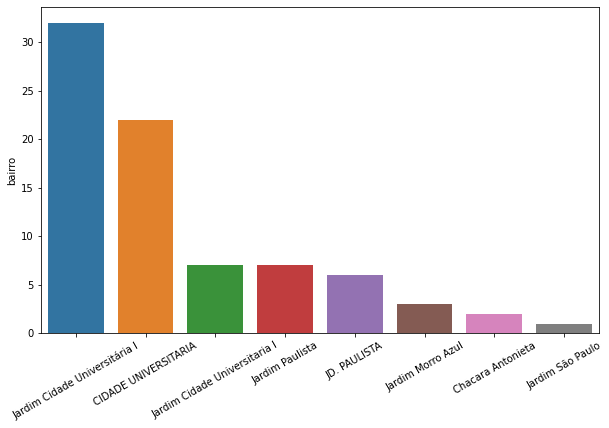

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_acomodacoes['bairro'].value_counts().index, y=df_acomodacoes['bairro'].value_counts())
plt.xticks(rotation=30)
plt.show()

In [192]:
bairro_map = {
    'Jardim Cidade Universitária I': 'JD. Cidade Universitária I',
    'CIDADE UNIVERSITARIA': 'JD. Cidade Universitária I',
    'Jardim Cidade Universitaria I': 'JD. Cidade Universitária I',
    'Jardim Paulista': 'JD. Paulista',
    'JD. PAULISTA': 'JD. Paulista',
    'Jardim Morro Azul': 'JD. Morro Azul',
    'Chacara Antonieta': 'Chácara Antonieta',
    'Jardim São Paulo': 'JD. São Paulo'
}

df_acomodacoes['bairro'] = df_acomodacoes['bairro'].map(bairro_map)
print(df_acomodacoes.shape)
df_acomodacoes['bairro'].unique()

(80, 12)


array(['JD. Cidade Universitária I', 'JD. Paulista', 'JD. São Paulo',
       'JD. Morro Azul', 'Chácara Antonieta'], dtype=object)

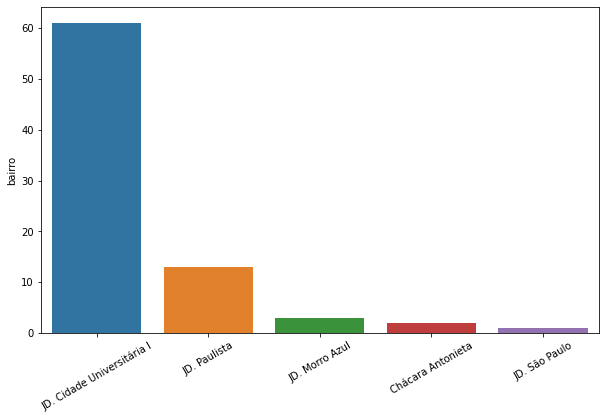

In [193]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_acomodacoes['bairro'].value_counts().index, y=df_acomodacoes['bairro'].value_counts())
plt.xticks(rotation=30)
plt.show()

Importando dados dos bairros eleitos

In [194]:
bairros_eleitos_file = files.upload()

Saving bairros_eleitos.csv to bairros_eleitos.csv


In [212]:
df_bairros = pd.read_csv('bairros_eleitos.csv')
df_bairros = df_bairros.drop(columns=['lat', 'lon'])
df_bairros

,bairro,dist
0,jardim aquarius,1.467927
1,parque centreville,1.158567
2,parque sao bento,1.258614
3,vila mathias,1.425913
4,vila sao joao,1.366778
5,jardim nossa sra. de fatima,0.466497
6,jardim santa fe,0.438750
7,cidade universitaria,1.385428
8,jardim perola,1.451089
9,jardim esmeralda,1.196814


In [213]:
df_bairros = df_bairros.iloc[[7, 11, 10, 19],:]
df_bairros = df_bairros.sort_values(by='dist').reset_index(drop=True)
df_bairros.head()

,bairro,dist
0,jardim paulista,0.447600
1,jardim morro azul,0.750764
2,cidade universitaria,1.385428
3,Chácara Antonieta,1.502339


In [216]:
dists_unicamp = []

for bairro in df_acomodacoes['bairro']:
  if bairro == 'JD. Cidade Universitária I':
    dists_unicamp.append(df_bairros.loc[2, 'dist'])
  elif bairro == 'JD. Paulista':
    dists_unicamp.append(df_bairros.loc[0, 'dist'])
  elif bairro == 'JD. Morro Azul':
    dists_unicamp.append(df_bairros.loc[1, 'dist'])
  elif bairro == 'Chácara Antonieta':
    dists_unicamp.append(df_bairros.loc[3, 'dist'])
  elif bairro == 'JD. São Paulo':
    dists_unicamp.append(np.nan)
dists_unicamp

[1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 1.3854276880650611,
 1.3854276880650611,
 0.4476004851487637,
 0.4476004851487637,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880

In [217]:
df_acomodacoes['dist_unicamp'] = dists_unicamp
print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 13)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
15,C,7500856834d96bce86e5e6343d8ef15f,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
21,C,d7605883477939a58e52e551391d5dcb,JD. Paulista,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375000,0.447600
61,B,ccbc8c34f1aafff2ded08a18d8826c6f,JD. Cidade Universitária I,800.0,0.0,250.0,1,1,NaN,Ótimo apartamento na Cidade Universitária com ...,800.0,3.200000,1.385428
78,A,57c6964ba64836c81a7a7a782a4d0eb1,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,1 QUARTO COM ARMÁRIO E AR CONDICIONADO;1 SALA ...,1000.0,NaN,1.385428
53,B,d81e604fe471f170cc3cc19ee73c20dc,JD. Paulista,900.0,0.0,NaN,1,1,NaN,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.447600


In [218]:
df_acomodacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   codigo        80 non-null     object 
 2   bairro        80 non-null     object 
 3   aluguel       79 non-null     float64
 4   condominio    80 non-null     float64
 5   area          34 non-null     float64
 6   quartos       80 non-null     int64  
 7   banheiros     80 non-null     int64  
 8   vaga_garagem  5 non-null      float64
 9   descricao     80 non-null     object 
 10  total         79 non-null     float64
 11  preco_m2      34 non-null     float64
 12  dist_unicamp  79 non-null     float64
dtypes: float64(7), int64(2), object(4)
memory usage: 8.2+ KB


### Análise

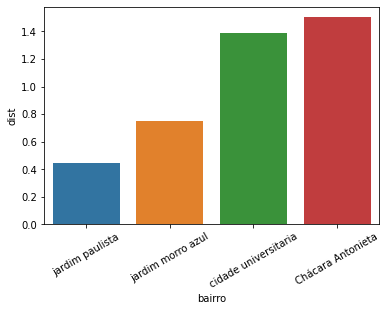

In [221]:
sns.barplot(x='bairro', y='dist', data=df_bairros)
plt.xticks(rotation=30)
plt.show()

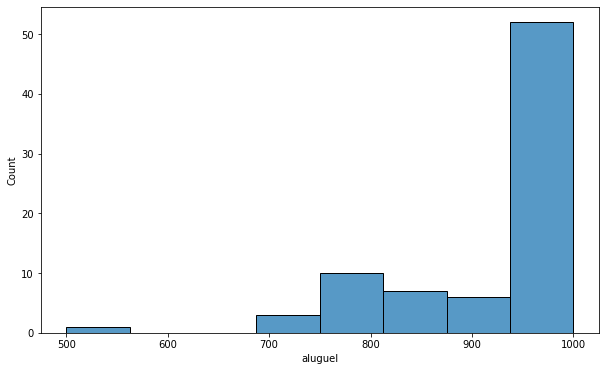

In [223]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acomodacoes, x="aluguel")
plt.show()

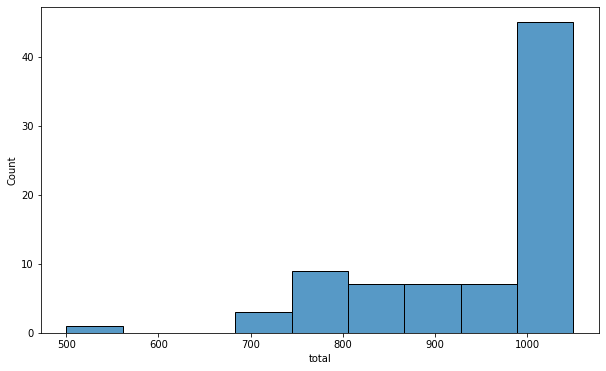

In [224]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acomodacoes, x="total")
plt.show()

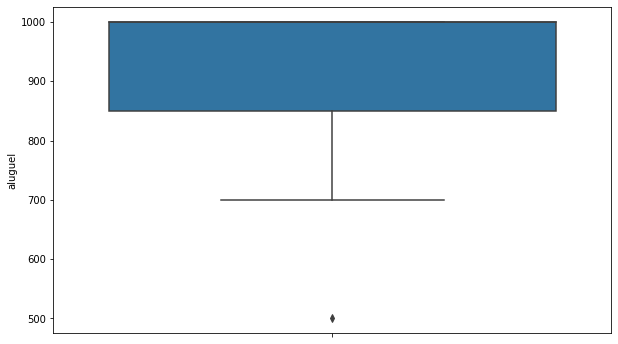

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_acomodacoes, y='aluguel')
plt.show()

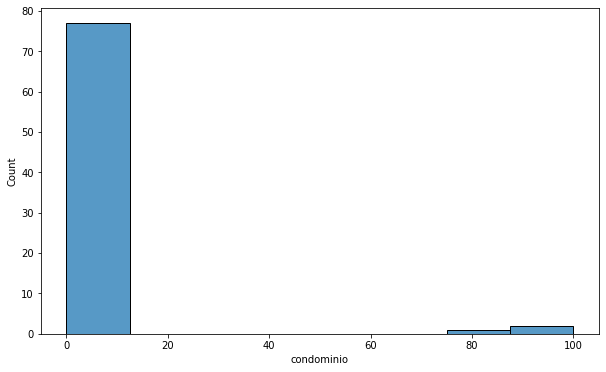

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acomodacoes, x="condominio")
plt.show()

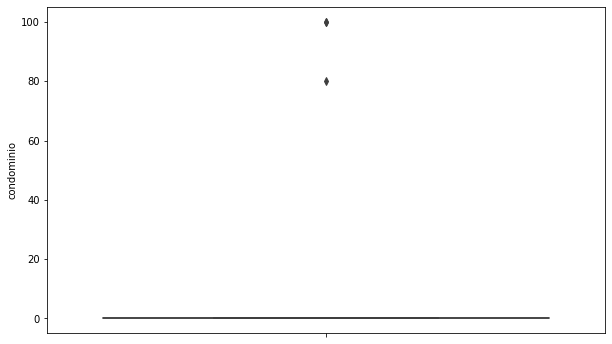

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_acomodacoes, y='condominio')
plt.show()

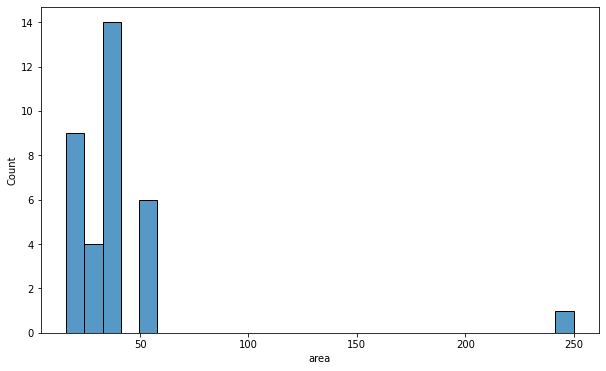

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acomodacoes, x="area")
plt.show()

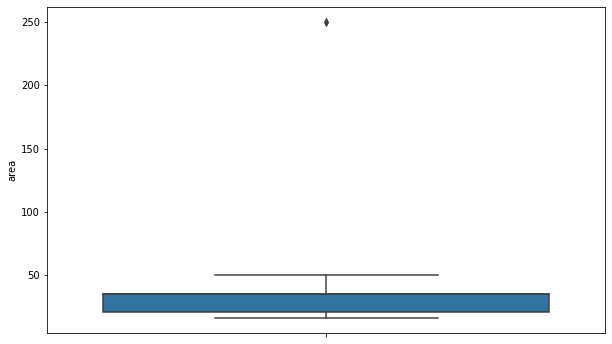

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_acomodacoes, y='area')
plt.show()

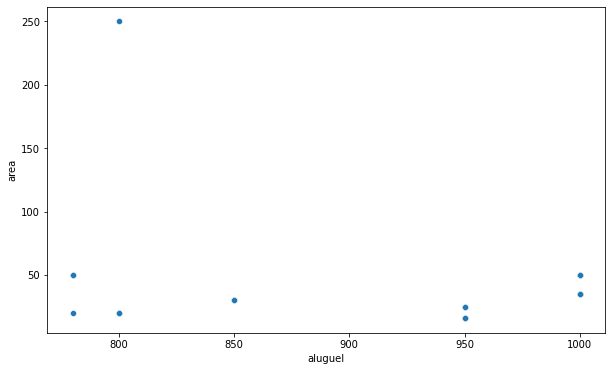

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aluguel', y='area', data=df_acomodacoes)
plt.show()

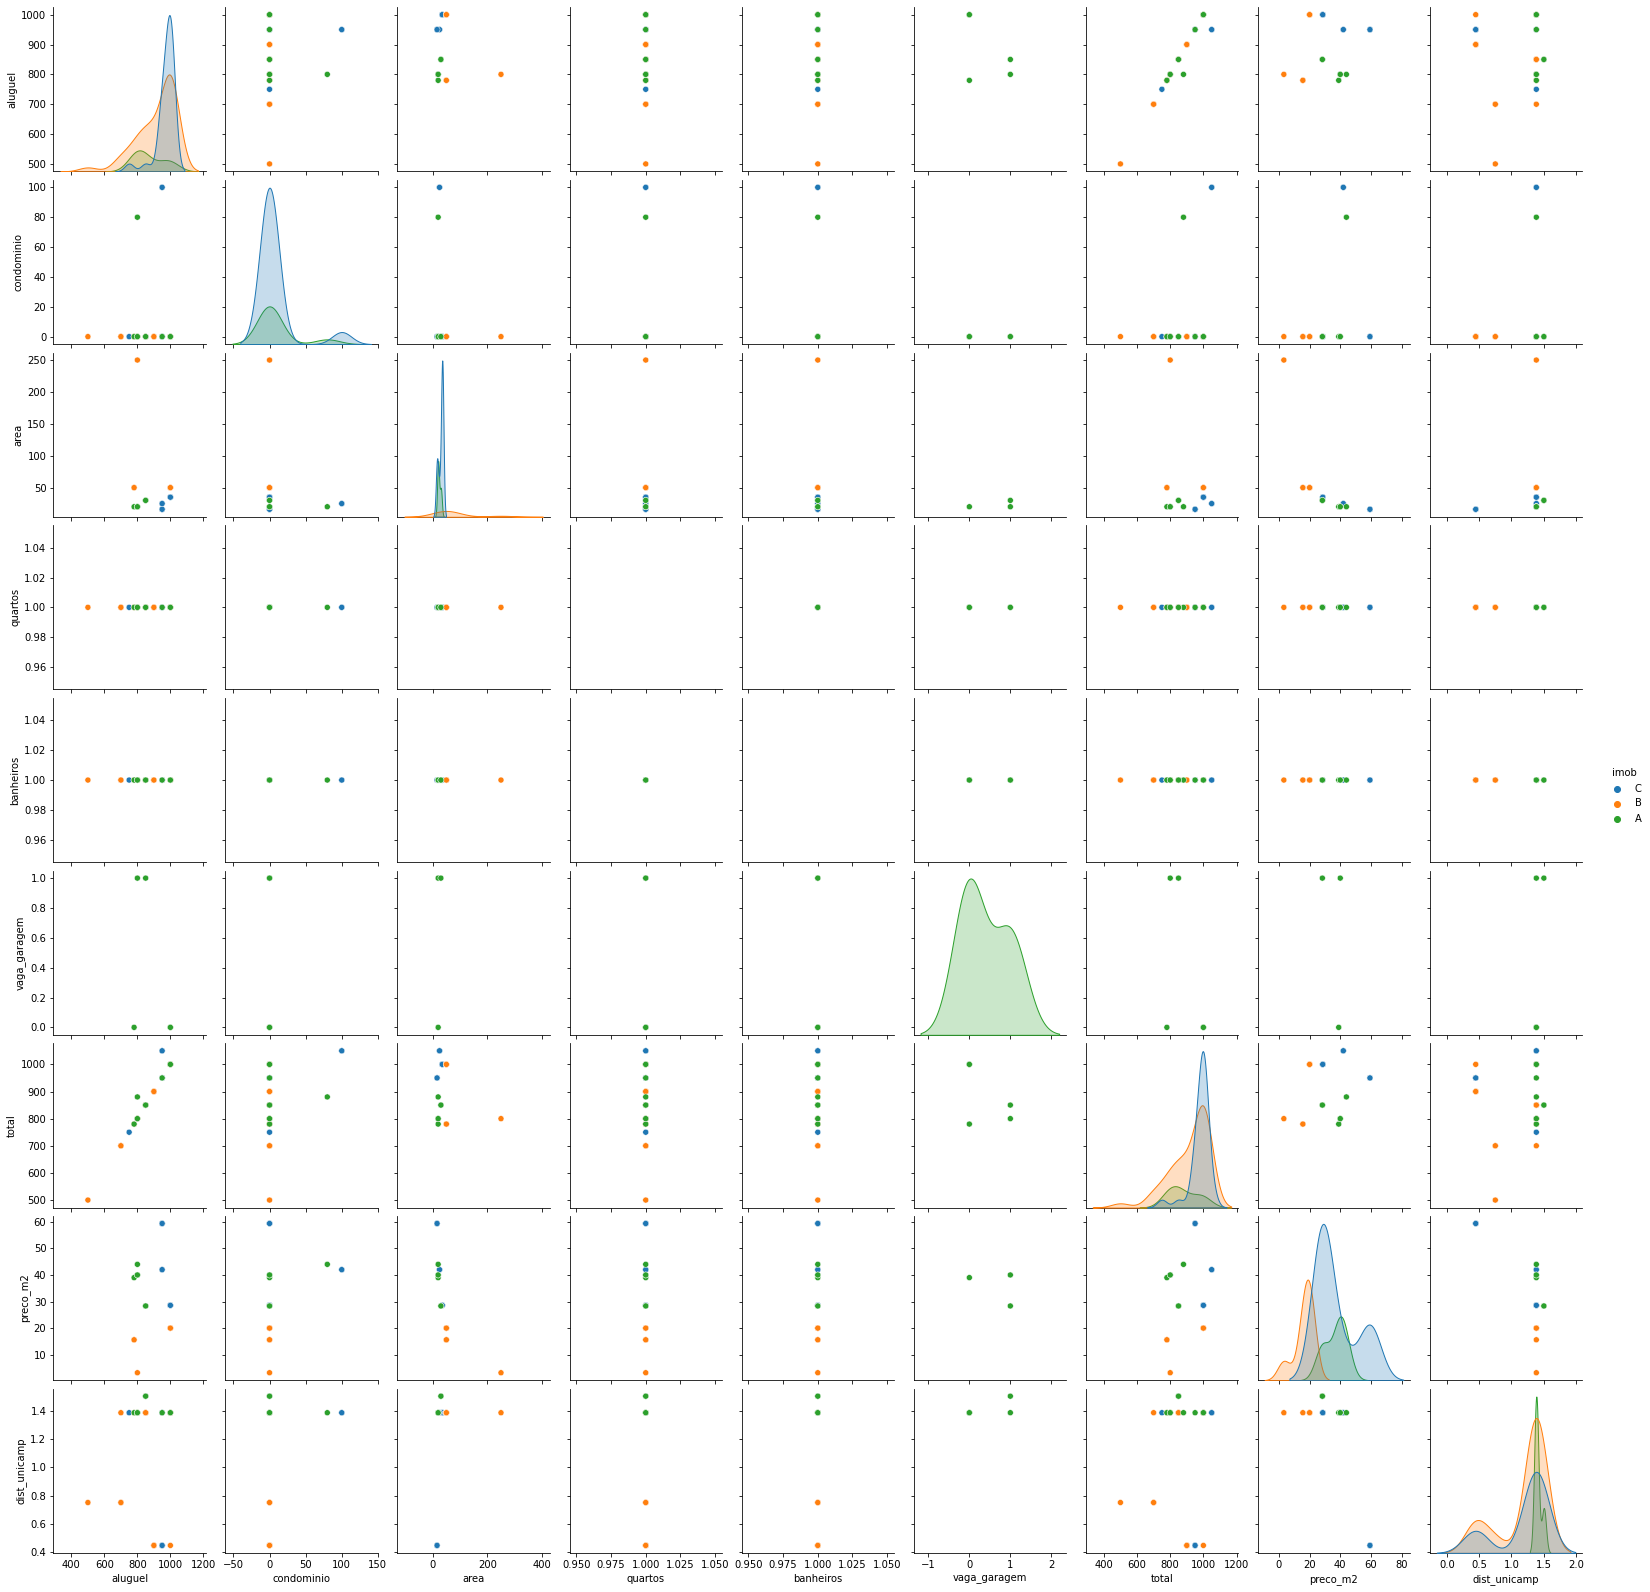

In [219]:
sns.pairplot(df_acomodacoes, hue='imob')
plt.show()

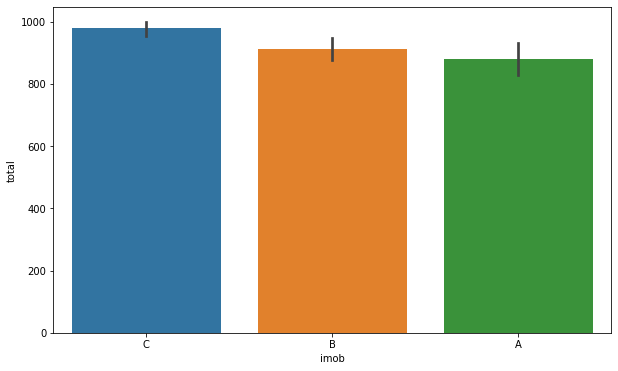

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(y='total', x='imob', data=df_acomodacoes)
plt.show()

In [169]:
df_acomodacoes['condominio'].value_counts()

0.0      77
100.0     2
80.0      1
Name: condominio, dtype: int64

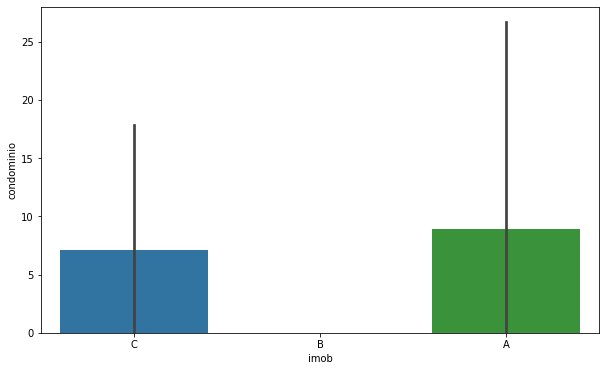

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(y='condominio', x='imob', data=df_acomodacoes)
plt.show()